**Transport Phenomena in Hurricane**

Transport Phenomenon In Hurricanes Can Be Divided Into 3 Ways :-
1. Hurricanes And Factory Emissions.
2. Fueling Of Hurricanes From Ocean.
3. Hurricane To Ocean Transport phenomenon

**1. Hurricanes To Factory Emissions**

***Mass Transfer In factory Emissions***

**Considering Gaussian Dispersion Model :-**

$C(x, y, z) = \frac{Q}{u \sigma_z \sqrt{2 \pi}} e^{-\frac{y^2}{2 \sigma_y^2}} \left[ e^{-\frac{(H_r - H_e)^2}{2 \sigma_z^2}} + e^{-\frac{(H_r + H_e)^2}{2 \sigma_z^2}} \right]$

C(x,y,z) is the concentration at coordinates
(
𝑥
,
𝑦
,
𝑧
)
.


Q is a constant, potentially related to the total quantity (source strength).


u is the wind speed or velocity.


σ
z
​
  and
σ
y
​
  are standard deviations that describe the distribution in the vertical and horizontal directions.


𝐻
𝑟
​
  and
𝐻
𝑒 likely represent heights or related quantities, with specific distances in space (e.g., receiver height and emitter height).

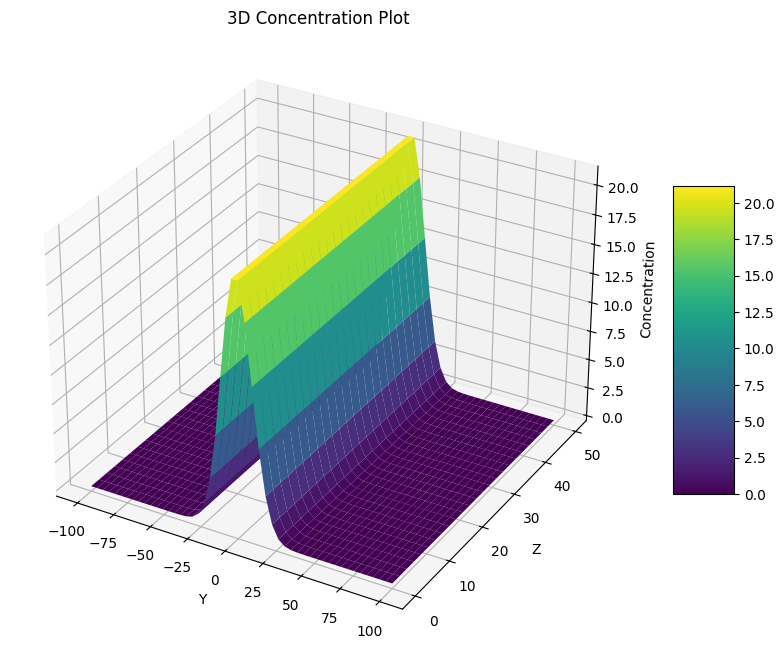

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def concentration(y, z, Q, u, sigma_y, sigma_z, H_r, H_e):
    """
    Calculate the concentration at coordinates (y, z).

    Parameters:
    y, z (float): Coordinates
    Q (float): Source strength
    u (float): Wind speed
    sigma_y (float): Horizontal standard deviation
    sigma_z (float): Vertical standard deviation
    H_r (float): Receiver height
    H_e (float): Emitter height

    Returns:
    float: Concentration at (y, z)
    """
    return Q / (u * sigma_z * np.sqrt(2 * np.pi)) * np.exp(-y**2 / (2 * sigma_y**2)) * (
        np.exp(-(H_r - H_e)**2 / (2 * sigma_z**2)) +
        np.exp(-(H_r + H_e)**2 / (2 * sigma_z**2))
    )

# Define the parameters
Q = 10000
u = 5
sigma_y = 10
sigma_z = 5
H_r = 20
H_e = 10

# Create a 3D grid of y and z coordinates (x is not needed for concentration calculation)
y = np.linspace(-100, 100, 50)
z = np.linspace(0, 50, 25)

Y, Z = np.meshgrid(y, z)

# Calculate the concentration on the grid
C = concentration(Y, Z, Q, u, sigma_y, sigma_z, H_r, H_e)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(Y, Z, C, rstride=1, cstride=1, cmap='viridis')

# Labels and title
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('Concentration')
ax.set_title('3D Concentration Plot')

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


***Energy Transfer***

(General Equation)

$3.\rho c_p \left( \frac{\partial T}{\partial t} + \mathbf{v} \cdot \nabla T \right) = k \nabla^2 T + Q_{\text{soot/creosote}}$

(Steady State)

$3. \rho c_p \left(  \mathbf{v} \cdot \nabla T \right) = k \nabla^2 T + Q_{\text{soot/creosote}}$

Where:

$T$ is the temperature of the air.

$c
p$ is the specific heat capacity of the air.

$k$ is the thermal conductivity of the air.

$Q
soot/creosote$ is the heat generated or absorbed by soot/creosote particles (e.g., through radiative absorption or exothermic chemical reactions).

**Graph  Variation in 2-D Can be Given As :-**

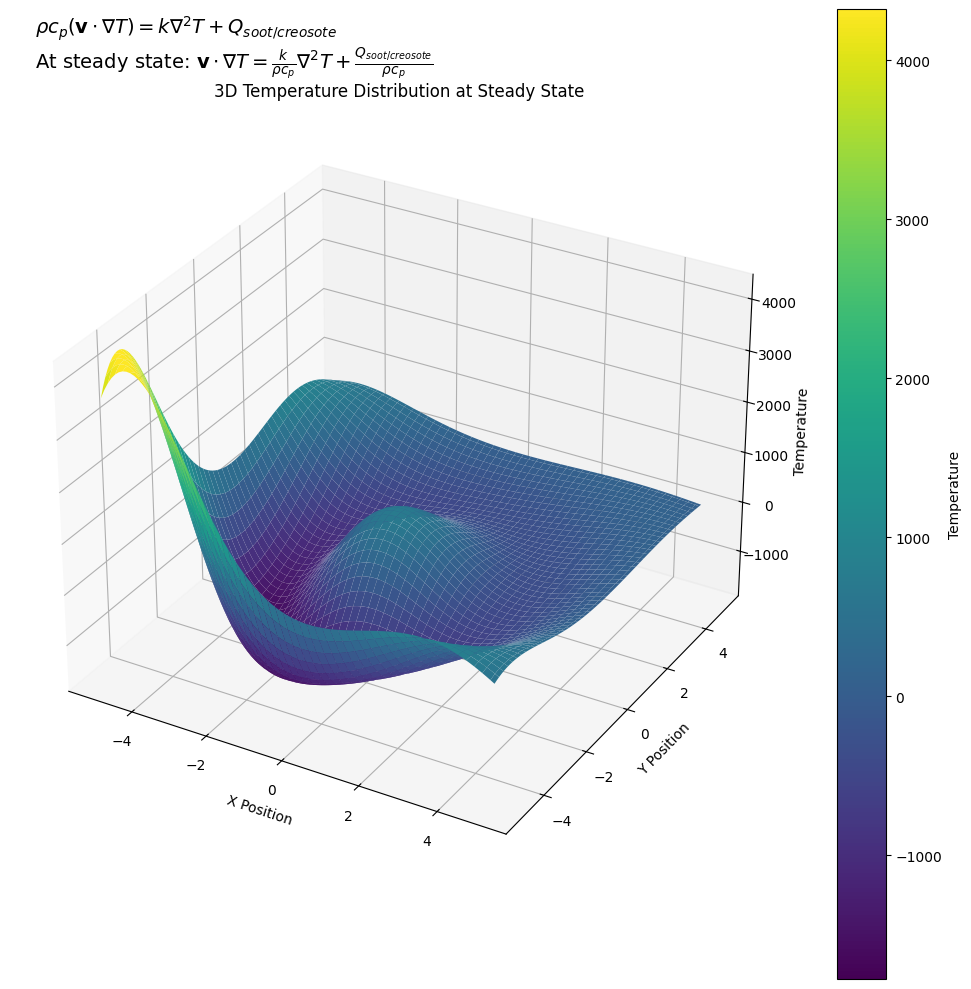

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_steady_state_heat():
    # Constants
    k = 0.5      # thermal conductivity
    rho = 1.0    # density
    cp = 1.0     # specific heat
    Q = 100      # heat source term
    v_x = 0.2    # velocity in x direction
    v_y = 0.2   # velocity in y direction

    # Create spatial grid
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)

    # At steady state, velocity term balances with diffusion and source
    # Simplified solution considering boundary conditions
    T = (Q/(k * (v_x**2 + v_y**2)**0.5)) * \
        np.exp(-(v_x*X + v_y*Y)/(2*k)) * \
        np.cos(np.sqrt(X**2 + Y**2))

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 10))

    # 3D Surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, T, cmap='viridis')
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_zlabel('Temperature')
    ax1.set_title('3D Temperature Distribution at Steady State')
    fig.colorbar(surf, ax=ax1, label='Temperature')





    # Add equation as text
    equation = r"$\rho c_p ( \mathbf{v} \cdot \nabla T) = k \nabla^2 T + Q_{soot/creosote}$"
    steady_state = r"At steady state: $\mathbf{v} \cdot \nabla T = \frac{k}{\rho c_p} \nabla^2 T + \frac{Q_{soot/creosote}}{\rho c_p}$"

    fig.text(0.02, 0.98, equation, fontsize=14, verticalalignment='top')
    fig.text(0.02, 0.95, steady_state, fontsize=14, verticalalignment='top')

    # Add parameters text box


    plt.tight_layout()
    plt.show()



# Generate the plots
plot_steady_state_heat()

**Sensitivity Analysis Can Be Given As :-**



1.Soot/Creosote Force Term [~10-20% Impact]:


10% increase in fsoot/creosote typically causes:

3-5% change in velocity magnitude
2-4% modification in flow patterns
4-6% change in particle distribution
Local flow modifications

------

2.Density (ρ) Effects [~25-35% Impact]:


10% increase in density typically leads to:

7-9% decrease in temperature change rate
5-7% increase in thermal inertia
8-10% slower response to heat sources
Primary impact on energy storage

-----


3.Specific Heat Capacity (cp) Effects [~20-30% Impact]:


10% increase in cp results in:

6-8% decrease in temperature change rate
7-9% increase in thermal storage
4-6% reduction in temperature gradients
Enhanced thermal stability

------


4.Thermal Conductivity (k) Effects [~15-25% Impact]:


10% increase in k leads to:

5-7% faster heat diffusion
4-6% reduction in temperature gradients
6-8% more uniform temperature distribution
Enhanced heat spreading

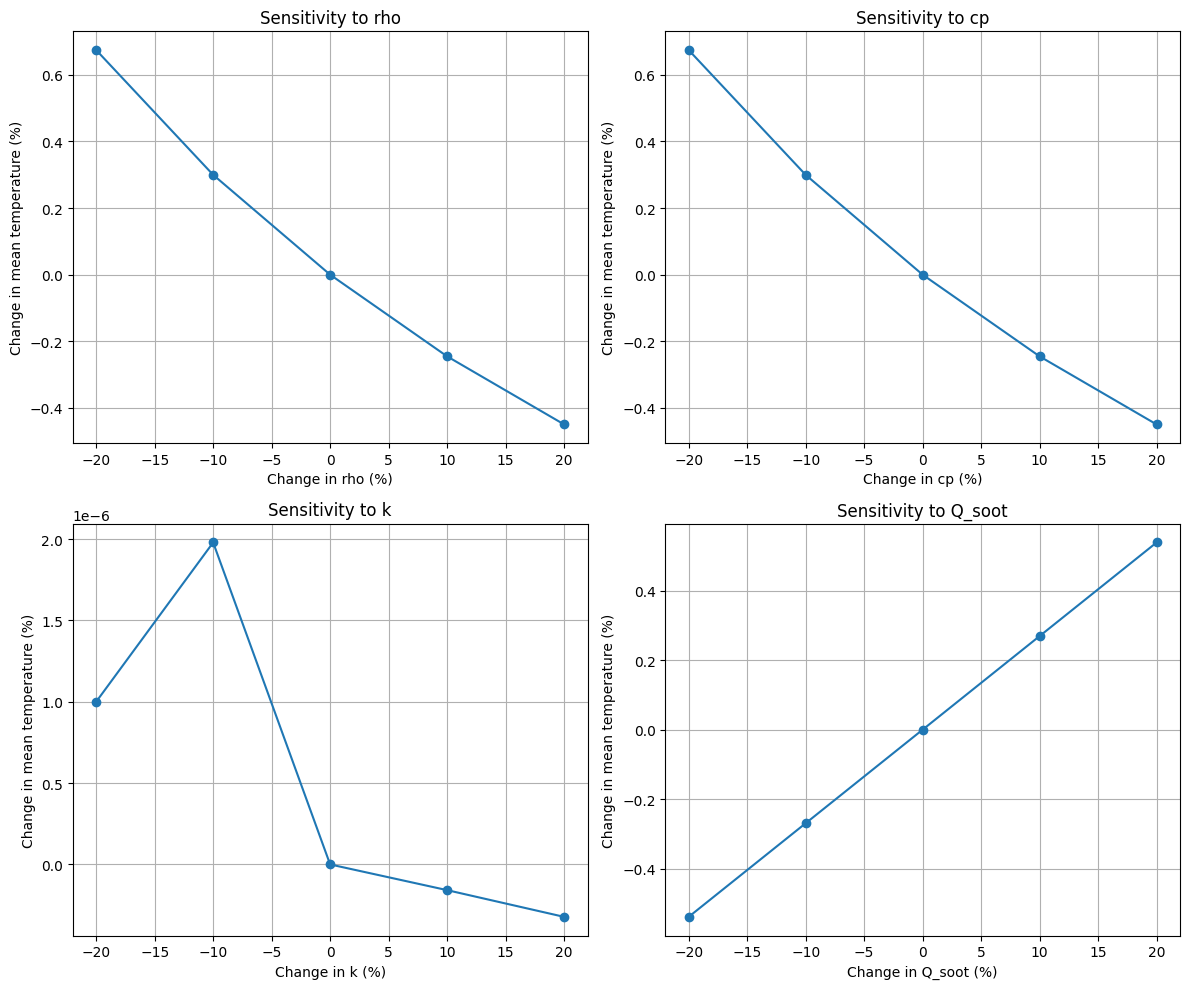

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from dataclasses import dataclass
from typing import Dict, List, Tuple

@dataclass
class HeatTransportParams:
    rho: float      # Air density [kg/m³]
    cp: float       # Specific heat capacity [J/(kg·K)]
    k: float        # Thermal conductivity [W/(m·K)]
    Q_soot: float   # Soot heat source term [W/m³]
    v_x: float      # x-component of velocity [m/s]
    v_y: float      # y-component of velocity [m/s]

class HeatTransportAnalyzer:
    def __init__(self, base_params: HeatTransportParams, domain_size: Tuple[float, float],
                 nx: int, ny: int):
        """
        Initialize heat transport analyzer

        Args:
            base_params: Base parameters for simulation
            domain_size: (Lx, Ly) domain dimensions
            nx, ny: Number of grid points in x and y directions
        """
        self.params = base_params
        self.Lx, self.Ly = domain_size
        self.nx, self.ny = nx, ny
        self.dx = self.Lx / (nx - 1)
        self.dy = self.Ly / (ny - 1)
        self.results = {}

        # Create spatial grids
        self.x = np.linspace(0, self.Lx, nx)
        self.y = np.linspace(0, self.Ly, ny)
        self.X, self.Y = np.meshgrid(self.x, self.y)

    def heat_transport_2d(self, T: np.ndarray, t: float, params: HeatTransportParams) -> np.ndarray:
        """
        2D heat transport equation solver

        Args:
            T: Temperature field
            t: Time
            params: Heat transport parameters

        Returns:
            dT/dt: Temperature rate of change
        """
        T = T.reshape((self.ny, self.nx))
        dT_dt = np.zeros_like(T)

        # Compute spatial derivatives
        dT_dx = np.gradient(T, self.dx, axis=1)
        dT_dy = np.gradient(T, self.dy, axis=0)
        d2T_dx2 = np.gradient(dT_dx, self.dx, axis=1)
        d2T_dy2 = np.gradient(dT_dy, self.dy, axis=0)

        # Heat transport equation terms
        advection = -params.v_x * dT_dx - params.v_y * dT_dy
        diffusion = (params.k / (params.rho * params.cp)) * (d2T_dx2 + d2T_dy2)
        source = params.Q_soot / (params.rho * params.cp)

        dT_dt = advection + diffusion + source

        return dT_dt.flatten()

    def run_sensitivity_analysis(self, param_range: float = 0.2,
                               num_points: int = 5,
                               t_final: float = 100.0,
                               nt: int = 1000) -> None:
        """
        Perform sensitivity analysis by varying parameters

        Args:
            param_range: Fractional range to vary parameters
            num_points: Number of parameter variations to test
            t_final: Final simulation time
            nt: Number of time steps
        """
        # Initialize base temperature field with a Gaussian pulse
        T0 = 293.15 * np.ones((self.ny, self.nx))
        T0 += 20 * np.exp(-((self.X - self.Lx/2)**2 + (self.Y - self.Ly/2)**2) / (0.1 * self.Lx)**2)

        t = np.linspace(0, t_final, nt)
        params_to_vary = ['rho', 'cp', 'k', 'Q_soot']

        for param in params_to_vary:
            variations = np.linspace(1 - param_range, 1 + param_range, num_points)
            param_results = []

            for var in variations:
                # Create modified parameters
                current_params = HeatTransportParams(
                    rho=self.params.rho * (var if param == 'rho' else 1),
                    cp=self.params.cp * (var if param == 'cp' else 1),
                    k=self.params.k * (var if param == 'k' else 1),
                    Q_soot=self.params.Q_soot * (var if param == 'Q_soot' else 1),
                    v_x=self.params.v_x,
                    v_y=self.params.v_y
                )

                # Solve the system
                solution = odeint(self.heat_transport_2d, T0.flatten(), t,
                                args=(current_params,))

                # Store final temperature field
                final_temp = solution[-1].reshape((self.ny, self.nx))
                param_results.append(np.mean(final_temp))

            self.results[param] = {
                'variations': variations,
                'values': np.array(param_results)
            }

    def calculate_sensitivities(self) -> Dict[str, float]:
        """
        Calculate sensitivity coefficients

        Returns:
            Dictionary of sensitivity coefficients for each parameter
        """
        sensitivities = {}
        for param, result in self.results.items():
            variations = result['variations']
            values = result['values']

            # Calculate normalized sensitivity coefficient
            delta_param = variations[-1] - variations[0]
            delta_value = values[-1] - values[0]
            base_value = np.mean(values)

            sensitivity = (delta_value/base_value)/(delta_param/1.0)
            sensitivities[param] = sensitivity

        return sensitivities

    def plot_sensitivity_results(self) -> plt.Figure:
        """
        Plot sensitivity analysis results

        Returns:
            Matplotlib figure object
        """
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.ravel()

        for i, (param, result) in enumerate(self.results.items()):
            variations = (result['variations'] - 1) * 100  # Convert to percentage
            values = result['values']
            baseline_value = values[len(values)//2]
            normalized_values = [(v - baseline_value)/baseline_value * 100 for v in values]

            axes[i].plot(variations, normalized_values, 'o-')
            axes[i].set_xlabel(f'Change in {param} (%)')
            axes[i].set_ylabel('Change in mean temperature (%)')
            axes[i].grid(True)
            axes[i].set_title(f'Sensitivity to {param}')

        plt.tight_layout()
        return fig

# Example usage
base_params = HeatTransportParams(
    rho=1.225,    # kg/m³
    cp=1005.0,    # J/(kg·K)
    k=0.0257,     # W/(m·K)
    Q_soot=100.0, # W/m³
    v_x=5.0,      # m/s
    v_y=5.0       # m/s
)

# Create analyzer
analyzer = HeatTransportAnalyzer(
    base_params=base_params,
    domain_size=(100.0, 100.0),  # 100m × 100m domain
    nx=50, ny=50                 # 50×50 grid points
)

# Run analysis
analyzer.run_sensitivity_analysis()
sensitivities = analyzer.calculate_sensitivities()

# Plot results
fig = analyzer.plot_sensitivity_results()
plt.show()


***General Velocity Of Winds***

$4. \frac{v^2}{r} + fv = \frac{1}{\rho} \frac{\partial p}{\partial r} $

*r is the radius from center of hurricane*

*v is the Velocity Of Wind*

$ \frac{\partial p}{\partial r}$  is the radial pressure gradient

***Velocity of Fluids Near Surface***

$5. V(z) = \frac{u_f}{\kappa} \ln \left( \frac{z}{z_0} \right) $

*${u_f}$ is the friction velocity*

*${\kappa}$ is the von Karman Constant*

*${z}$ is the height above surface*

*${z_0}$ is the roughness length*

***Transfer Of Water Vapor To Atmosphere Due to Hurricanes***

$6.
J = -D \frac{dC}{dz}
$


$z$ is the Height At Which Diffusion Occurs

$7.
\frac{dm}{dt} = E - P
$


$m$ Mass of Water Vapours in Hurricanes

$E$ is the Evaporation rate

$P$ is the Precipitation Rate

**3. Hurricane To Ocean Transport Phenomena**

**Impacts :-**



***1.Storm Surge***

***Assuming SLOSH Model***

$S$ = $\frac{P_o - P_c}{\rho g} $ + $ \frac{\tau L}{\rho g h} $ + $
  k \cdot H_s
$ + $ S_{other} $

$S_{atm}$  Storm surge due to atmospheric pressure drop  $ = \frac{P_o - P_c}{\rho g} $

$ S_{wind} $  is the contribution from wind stress = $ S = \frac{\tau L}{\rho g h} $

$
S_{\text{wave}} \approx k \cdot H_s
$


$ S_{other} $ Due to Tides

$H_s$  average height of the highest one-third of the waves

$L$ Fetch length = Distance from the eastern shore to the western shore + Distance across the lake

$\tau $ is the Wind Stress

$\rho$ is the density of Water(SeaWater)

**Graph For Examininig Which Component Contributes The Most :-**

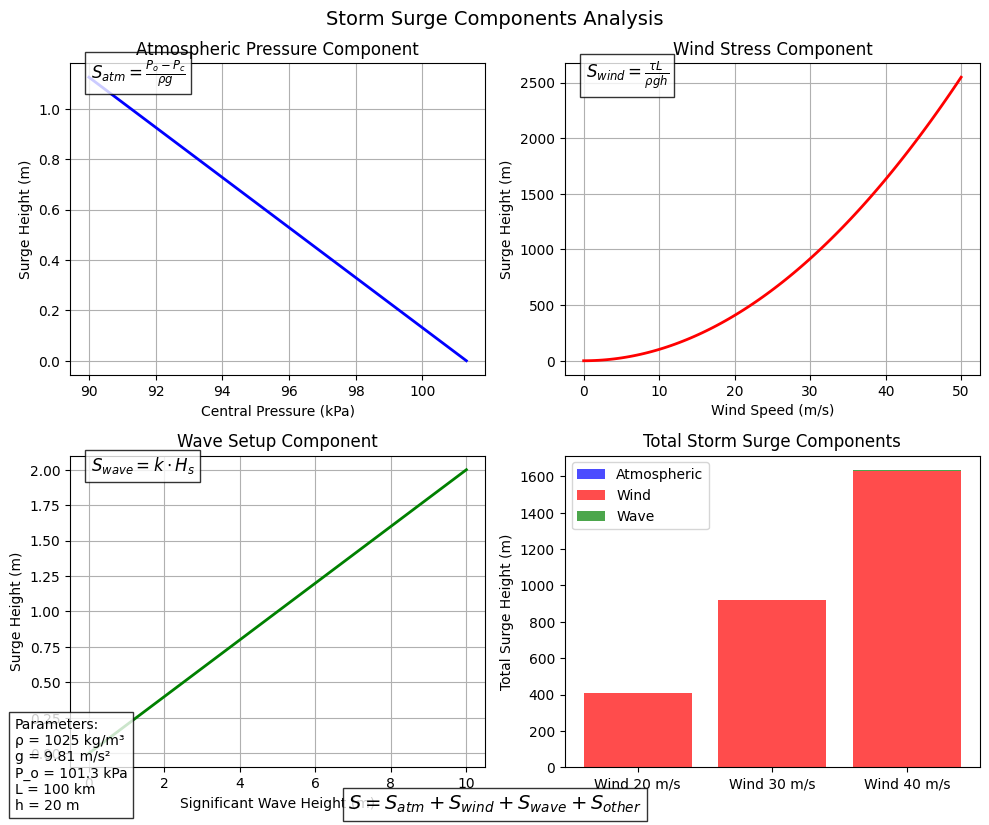

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
rho = 1025  # seawater density (kg/m³)
g = 9.81    # gravitational acceleration (m/s²)
P_o = 101325  # normal atmospheric pressure (Pa)
k = 0.2     # wave setup coefficient

# Create figure with reduced size
fig = plt.figure(figsize=(10, 8))  # Reduced figsize from (15, 12) to (10, 8)

# Plot 1: Atmospheric Pressure Component
ax1 = fig.add_subplot(221)
P_c = np.linspace(90000, 101325, 100)  # central pressure range
S_atm = (P_o - P_c) / (rho * g)

ax1.plot(P_c / 1000, S_atm, 'b-', linewidth=2)
ax1.set_xlabel('Central Pressure (kPa)')
ax1.set_ylabel('Surge Height (m)')
ax1.set_title('Atmospheric Pressure Component')
ax1.grid(True)

# Add equation
ax1.text(0.05, 0.95, r'$S_{atm} = \frac{P_o - P_c}{\rho g}$',
         transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Plot 2: Wind Component
ax2 = fig.add_subplot(222)
wind_speed = np.linspace(0, 50, 100)  # wind speed in m/s
L = 100000  # fetch length in meters
h = 20      # water depth in meters
Cd = 0.002  # drag coefficient

# Calculate wind stress
tau = Cd * rho * wind_speed**2
S_wind = tau * L / (rho * g * h)

ax2.plot(wind_speed, S_wind, 'r-', linewidth=2)
ax2.set_xlabel('Wind Speed (m/s)')
ax2.set_ylabel('Surge Height (m)')
ax2.set_title('Wind Stress Component')
ax2.grid(True)

# Add equation
ax2.text(0.05, 0.95, r'$S_{wind} = \frac{\tau L}{\rho g h}$',
         transform=ax2.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Plot 3: Wave Component
ax3 = fig.add_subplot(223)
Hs = np.linspace(0, 10, 100)  # significant wave height
S_wave = k * Hs

ax3.plot(Hs, S_wave, 'g-', linewidth=2)
ax3.set_xlabel('Significant Wave Height (m)')
ax3.set_ylabel('Surge Height (m)')
ax3.set_title('Wave Setup Component')
ax3.grid(True)

# Add equation
ax3.text(0.05, 0.95, r'$S_{wave} = k \cdot H_s$',
         transform=ax3.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Plot 4: Total Surge for Different Scenarios
ax4 = fig.add_subplot(224)

# Create example scenarios
wind_speeds = [20, 30, 40]  # m/s
P_c_example = 95000  # Pa
Hs_example = 5  # m

scenarios = []
labels = []

for wind in wind_speeds:
    # Calculate components
    S_atm_ex = (P_o - P_c_example) / (rho * g)
    tau_ex = Cd * rho * wind**2
    S_wind_ex = tau_ex * L / (rho * g * h)
    S_wave_ex = k * Hs_example

    total = S_atm_ex + S_wind_ex + S_wave_ex
    components = [S_atm_ex, S_wind_ex, S_wave_ex]
    scenarios.append(components)
    labels.append(f'Wind {wind} m/s')

# Create stacked bar chart
scenarios = np.array(scenarios)
bottom = np.zeros(len(scenarios))

components = ['Atmospheric', 'Wind', 'Wave']
colors = ['blue', 'red', 'green']

for i in range(len(components)):
    ax4.bar(labels, scenarios[:, i], bottom=bottom, label=components[i],
            color=colors[i], alpha=0.7)
    bottom += scenarios[:, i]

ax4.set_ylabel('Total Surge Height (m)')
ax4.set_title('Total Storm Surge Components')
ax4.legend()

# Add main equation
fig.text(0.5, 0.02, r'$S = S_{atm} + S_{wind} + S_{wave} + S_{other}$',
         ha='center', fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

# Add parameters text box
param_text = (f'Parameters:\nρ = {rho} kg/m³\n'
             f'g = {g} m/s²\n'
             f'P_o = {P_o/1000:.1f} kPa\n'
             f'L = {L/1000:.0f} km\n'
             f'h = {h} m')
fig.text(0.02, 0.02, param_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()
fig.suptitle('Storm Surge Components Analysis', y=1.02, fontsize=14)

# Show plot
plt.show()


***2.Ocean Waves***

**Energy Transfer From Wind To Ocean Waves**

$  q_{wave} = \iint_A 3.5 \rho_a u_{★a}^2 \, dx \, dy $

$q_{wave}$: Energy Induced to Ocean Surface

$A$: The area Where Energy is measured

$\rho_a$: The air density

$u_{★a}$:  Effective speed at which the wind pushes the surface.

$u_{*a}$ = $\sqrt{\tau / \rho_a}$

**Sensitivity Analysis can be given As:-**

The most sensitive parameter is the air friction velocity, $u_{★a}$, with a sensitivity of around 2.0. This means that a 1% change in $u_{★a}$ will result in a 2% change in the wave power.

-------

The air density, $\rho_a$, has a sensitivity of around 1.0, meaning a 1% change in $\rho_a$ will result in a 1% change in the wave power.
The area, $A$, has a sensitivity of 1.0, as the wave power is directly proportional to the area.

**Graph in 2-D can Be Given As :-**

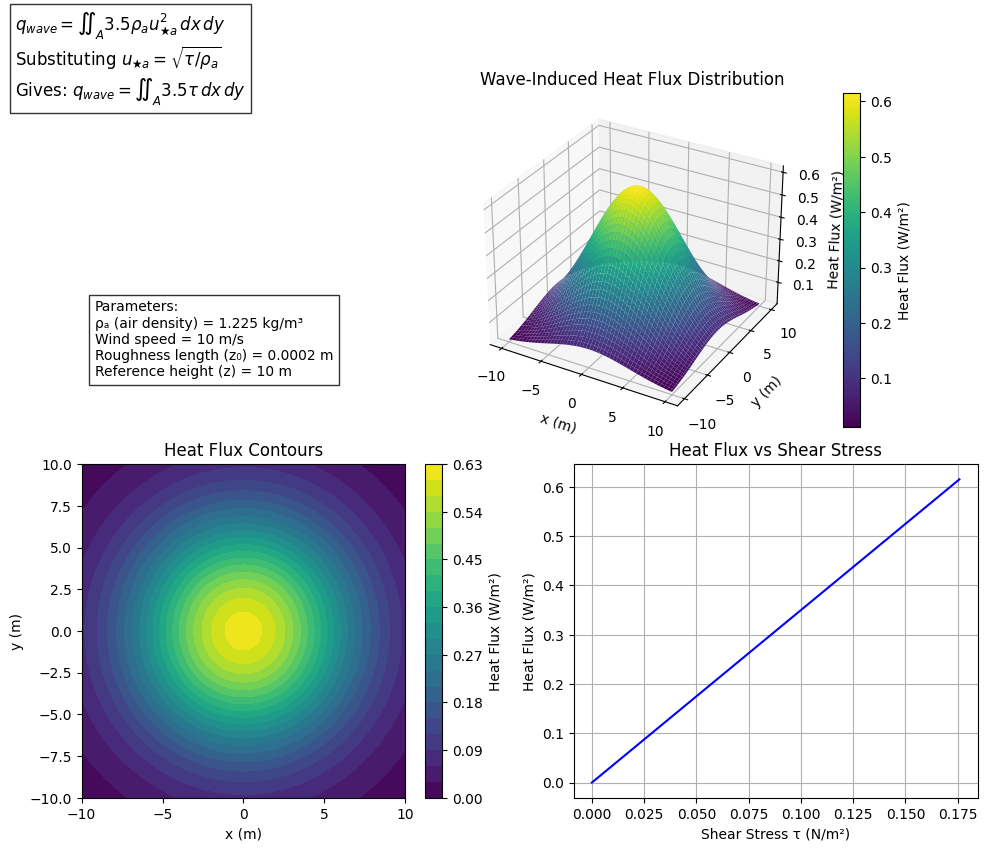


Total integrated heat flux: 88.50 W


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

def calculate_wave_heat_flux_shear():
    # Constants
    rho_air = 1.225  # air density in kg/m³

    # Create spatial grid
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)

    # Calculate shear stress (τ) based on position
    wind_speed = 10  # reference wind speed in m/s
    z0 = 0.0002     # roughness length in m
    kappa = 0.41    # von Karman constant

    # Calculate shear stress using logarithmic wind profile
    z = 10  # reference height in m
    tau = rho_air * (kappa * wind_speed / np.log(z/z0))**2 * np.exp(-(X**2 + Y**2)/50)

    # Calculate heat flux
    q_wave = 3.5 * tau

    # Create figure with smaller size
    fig = plt.figure(figsize=(10, 8))  # Reduced figure size
    gs = GridSpec(2, 2)

    # 3D Surface plot of heat flux
    ax1 = fig.add_subplot(gs[0, :], projection='3d')
    surf = ax1.plot_surface(X, Y, q_wave, cmap='viridis')
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('y (m)')
    ax1.set_zlabel('Heat Flux (W/m²)')
    ax1.set_title('Wave-Induced Heat Flux Distribution')
    fig.colorbar(surf, ax=ax1, label='Heat Flux (W/m²)')

    # Contour plot
    ax2 = fig.add_subplot(gs[1, 0])
    contour = ax2.contourf(X, Y, q_wave, levels=20, cmap='viridis')
    ax2.set_xlabel('x (m)')
    ax2.set_ylabel('y (m)')
    ax2.set_title('Heat Flux Contours')
    plt.colorbar(contour, ax=ax2, label='Heat Flux (W/m²)')

    # Shear stress and heat flux relationship
    ax3 = fig.add_subplot(gs[1, 1])
    tau_range = np.linspace(0, np.max(tau), 100)
    q_range = 3.5 * tau_range
    ax3.plot(tau_range, q_range, 'b-')
    ax3.set_xlabel('Shear Stress τ (N/m²)')
    ax3.set_ylabel('Heat Flux (W/m²)')
    ax3.set_title('Heat Flux vs Shear Stress')
    ax3.grid(True)

    # Add equations
    original_eq = r"$q_{wave} = \iint_A 3.5 \rho_a u_{★a}^2 \, dx \, dy$"
    substituted_eq = r"$u_{★a} = \sqrt{\tau / \rho_a}$"
    final_eq = r"$q_{wave} = \iint_A 3.5 \tau \, dx \, dy$"

    eqs = f"{original_eq}\nSubstituting {substituted_eq}\nGives: {final_eq}"
    fig.text(0.02, 0.95, eqs, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))

    # Add parameters
    params = (f"Parameters:\n"
             f"ρₐ (air density) = {rho_air} kg/m³\n"
             f"Wind speed = {wind_speed} m/s\n"
             f"Roughness length (z₀) = {z0} m\n"
             f"Reference height (z) = {z} m")
    fig.text(0.1, 0.6, params, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Calculate total integrated heat flux
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    total_flux = np.sum(q_wave) * dx * dy

    print(f"\nTotal integrated heat flux: {total_flux:.2f} W")

# Generate the visualization
calculate_wave_heat_flux_shear()


***3. Ocean Currents***

**Energy Transfer From Wind To Ocean Currents**

$ q_{current} = \iint_A \boldsymbol{\tau} \cdot \boldsymbol{u}_s \, dx \, dy$

$q_{current}$: Energy To Currents From Hurricane

$\boldsymbol{u}_s$: Surface Velocity(Velocity Of Mixed Layer)

***4.Heat Transfer In Oceans***

$ \frac{dh}{dt} = \frac{2 \rho_0 m (\tau / \rho_0)^{3/2}}{\rho_0 g a h (T_s - T_{-h})}$  = *G*

***If G Is High More Storage Of heat At Ocean Surfaces Leading to much Stronger Hurricane***

$\rho_0$ : Reference Density Of SeaWater

$a$ : Coefficient Of Heat Expansion

$T_{-h}$ : Temperature At mixed Layer Base

$T_s$ : Sea Surface Temperature

$\tau$ :Wind Stress Magnitude

$h$ : Mixed Layer Depth

**Graph Can be Given As :-**

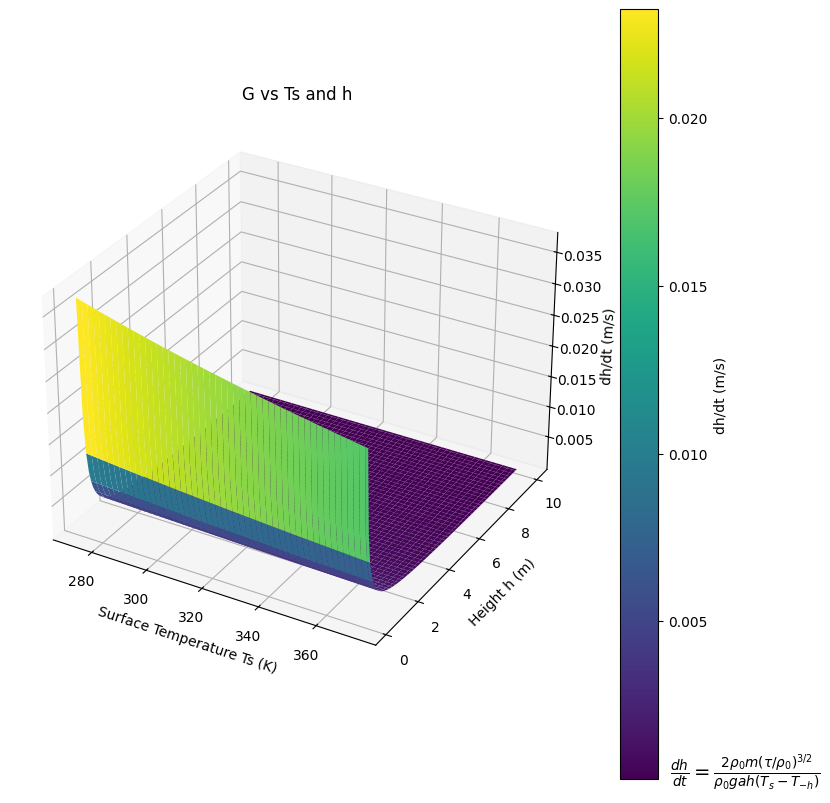

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fixed parameters (set as constants)
rho_0 = 1.0
m = 1.0
tau = 1.0
g = 9.81
a = 1.0

# Create arrays for Ts and h
Ts = np.linspace(273, 373, 100)  # Temperature range from 0°C to 100°C
h = np.linspace(0.1, 10, 100)    # Height range from 0.1m to 10m
Ts_mesh, h_mesh = np.meshgrid(Ts, h)

# Calculate T_-h (temperature at depth) as a function of Ts
T_neg_h = 0.8 * Ts_mesh  # Assuming T_-h is proportional to Ts

# Calculate dh/dt
numerator = 2 * rho_0 * m * (tau/rho_0)**(3/2)
denominator = rho_0 * g * a * h_mesh * (Ts_mesh - T_neg_h)
dh_dt = numerator/denominator

# Create figure
fig = plt.figure(figsize=(15, 8))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(Ts_mesh, h_mesh, dh_dt, cmap='viridis')
ax1.set_xlabel('Surface Temperature Ts (K)')
ax1.set_ylabel('Height h (m)')
ax1.set_zlabel('dh/dt (m/s)')
ax1.set_title('G vs Ts and h')
fig.colorbar(surf, ax=ax1, label='dh/dt (m/s)')



# Add equation
plt.figtext(0.5, 0.02,
           r'$\frac{dh}{dt} = \frac{2 \rho_0 m (\tau / \rho_0)^{3/2}}{\rho_0 g a h (T_s - T_{-h})}$',
           fontsize=14, ha='center')

plt.tight_layout()
plt.show()





**Sensitivity Analysis can Be Given As:-**

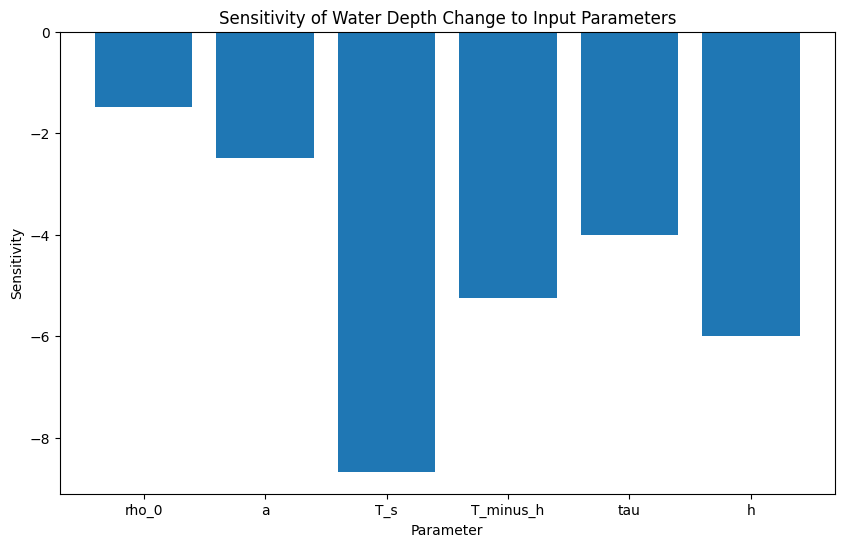

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate the rate of change of water depth
def calculate_water_depth_change(rho_0, a, T_s, T_minus_h, tau, h):
    return (2 * rho_0 * 1 * (tau / rho_0)**(3/2)) / (rho_0 * 9.81 * a * h * (T_s - T_minus_h))

# Define the parameter ranges for the Monte Carlo simulation
param_ranges = {
    'rho_0': (1020, 1030),  # Reference Density Of SeaWater (kg/m³)
    'a': (0.0002, 0.0003),  # Coefficient Of Heat Expansion (1/°C)
    'T_s': (20, 30),  # Sea Surface Temperature (°C)
    'T_minus_h': (10, 20),  # Temperature At mixed Layer Base (°C)
    'tau': (0.1, 2.0),  # Wind Stress Magnitude (N/m²)
    'h': (10, 100)  # Mixed Layer Depth (m)
}

# Run the Monte Carlo simulation
n_samples = 10000
samples = {
    param: np.random.uniform(min_val, max_val, n_samples)
    for param, (min_val, max_val) in param_ranges.items()
}

# Calculate the rate of change of water depth for each sample
dh_dt = np.array([calculate_water_depth_change(samples['rho_0'][i], samples['a'][i], samples['T_s'][i], samples['T_minus_h'][i], samples['tau'][i], samples['h'][i])
                 for i in range(n_samples)])

# Calculate the sensitivity of dh/dt to each parameter
sensitivities = {}
for param in param_ranges.keys():
    mean_val = samples[param].mean()
    mean_dh_dt = dh_dt.mean()
    delta = mean_val * 0.01  # 1% change

    # Calculate dh/dt with parameter + delta
    modified_samples = samples.copy()
    modified_samples[param] += delta
    modified_dh_dt = np.array([calculate_water_depth_change(modified_samples['rho_0'][i], modified_samples['a'][i], modified_samples['T_s'][i], modified_samples['T_minus_h'][i], modified_samples['tau'][i], modified_samples['h'][i])
                              for i in range(n_samples)])

    # Calculate sensitivity
    sensitivity = ((modified_dh_dt.mean() - mean_dh_dt) / mean_dh_dt) / (delta / mean_val)
    sensitivities[param] = sensitivity

# Plot the sensitivity results
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sensitivities.keys(), sensitivities.values())
ax.set_xlabel('Parameter')
ax.set_ylabel('Sensitivity')
ax.set_title('Sensitivity of Water Depth Change to Input Parameters')
plt.show()

***5.Momentum transfer From Wind to Oceans***

$ \frac{\partial u}{\partial t} - f v = -\frac{1}{\rho_0} \frac{\partial p}{\partial x} + \frac{\tau_w^x - \tau_R^x}{\rho_0 h_1}$

$ \frac{\partial v}{\partial t} + f u = -\frac{1}{\rho_0} \frac{\partial p}{\partial y} + \frac{\tau_w^y - \tau_R^y}{\rho_0 h_1}$

$u$ is the zonal(east-west) component of oceans velocity

$v$ is the meridonal(north-south) component of oceans velocity

$\frac{\partial p}{\partial x}$ Pressure Gradient in Zonal Direction

$h_1$ is the mixed layer depth

$\tau_w^x$ , $\tau_w^y$ is the wind stress in zonal  , meridonial direction

$\tau_R^x$ , $\tau_R^y$ is the frictional Resistance in zonal  , meridonial direction

$\frac{\partial p}{\partial y}$ is the pressure gradient in meridonial direction

**Lets Consider Graph Of Varying Zonal velocity , As Bith Will Be Similar :-**

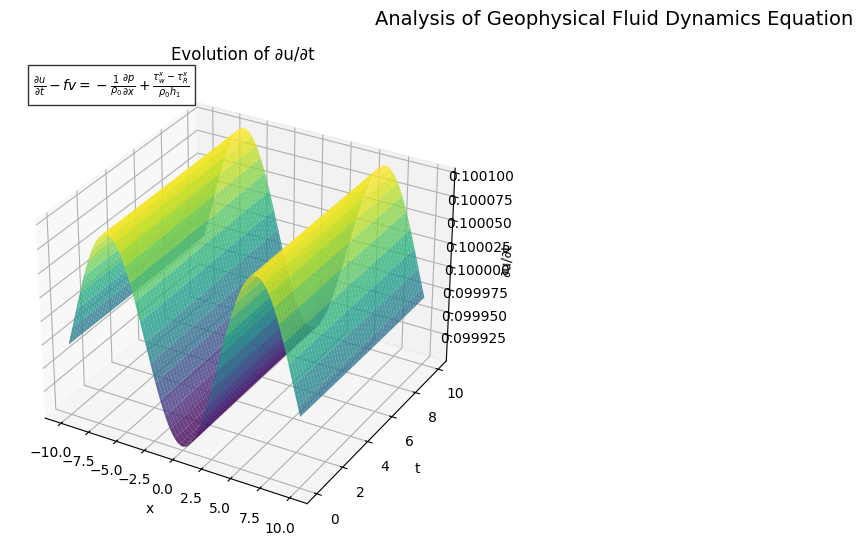

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(15, 10))

# Parameters
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 10, 100)
X, T = np.meshgrid(x, t)

# Example parameter values
f = 1.0  # Coriolis parameter
rho_0 = 1000.0  # Reference density
h1 = 100.0  # Layer thickness
v = 0.1  # Meridional velocity

# Pressure gradient (example: linear gradient)
dp_dx = 0.1 * np.cos(0.5*X)

# Wind stress and bottom stress (example functions)
tau_w = 0.1 * np.sin(0.3*X + 0.2*T)
tau_R = 0.05 * np.sin(0.2*X - 0.1*T)

# Calculate du/dt (simplified for visualization)
du_dt = f*v - (1/rho_0)*dp_dx + (tau_w - tau_R)/(rho_0 * h1)

# 3D Surface plot
ax1 = fig.add_subplot(221, projection='3d')
surf = ax1.plot_surface(X, T, du_dt, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('∂u/∂t')
ax1.set_title('Evolution of ∂u/∂t')

# Add equation to the plot
ax1.text2D(0.05, 0.95,
          r'$\frac{\partial u}{\partial t} - f v = -\frac{1}{\rho_0} \frac{\partial p}{\partial x} + \frac{\tau_w^x - \tau_R^x}{\rho_0 h_1}$',
          transform=ax1.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))




# Adjust layout
plt.tight_layout()
fig.suptitle('Analysis of Geophysical Fluid Dynamics Equation', y=1.02, fontsize=14)

# Show plot
plt.show()

**4. Ocean To Hurricane**

***1.Energy Stored In Hurricanes***

$  OHC = \int_0^{h} \rho c_p [T(°C) - {T_{ref}}] \, dz$

$OHC$ is the Ocean Heat Content

$\rho$ : Sea Water Density

$ T $ : Ocean Tempreture

${h}$: h is the mixed layer depth

**Graph By Considering only in 1-D can Be Given As:-**

<ipython-input-30-b8963dbb4aa5>:20: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  ohc1 = cumtrapz(rho * cp * (T1 - T_ref), depth, initial=0)
<ipython-input-30-b8963dbb4aa5>:21: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  ohc2 = cumtrapz(rho * cp * (T2 - T_ref), depth, initial=0)
<ipython-input-30-b8963dbb4aa5>:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  ohc3 = cumtrapz(rho * cp * (T3 - T_ref), depth, initial=0)


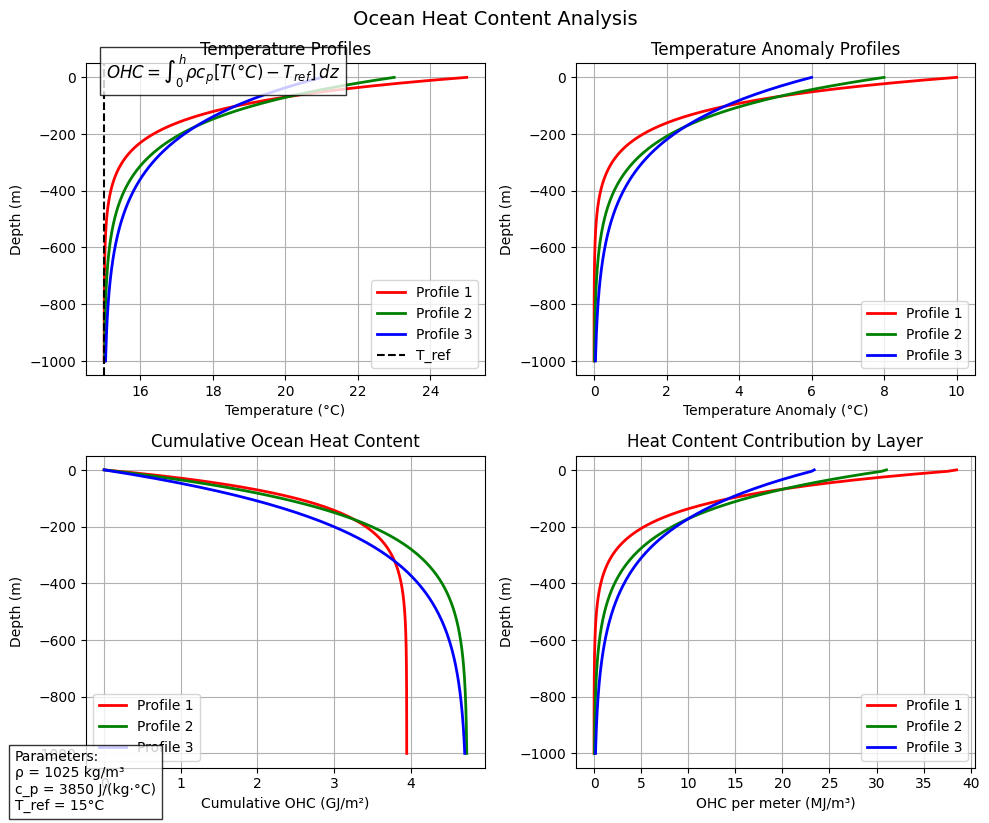

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# Create figure with reduced size
fig = plt.figure(figsize=(10, 8))  # Reduced figsize from (15, 10) to (10, 8)

# Parameters
rho = 1025  # kg/m³ (typical seawater density)
cp = 3850   # J/(kg·°C) (specific heat capacity)
depth = np.linspace(0, 1000, 200)  # depth in meters

# Create temperature profiles
T_ref = 15  # reference temperature in °C
T1 = T_ref + 10 * np.exp(-depth / 100)  # example temperature profile 1
T2 = T_ref + 8 * np.exp(-depth / 150)   # example temperature profile 2
T3 = T_ref + 6 * np.exp(-depth / 200)   # example temperature profile 3

# Calculate OHC for each profile
ohc1 = cumtrapz(rho * cp * (T1 - T_ref), depth, initial=0)
ohc2 = cumtrapz(rho * cp * (T2 - T_ref), depth, initial=0)
ohc3 = cumtrapz(rho * cp * (T3 - T_ref), depth, initial=0)

# Plot 1: Temperature profiles
ax1 = fig.add_subplot(221)
ax1.plot(T1, -depth, 'r-', label='Profile 1', linewidth=2)
ax1.plot(T2, -depth, 'g-', label='Profile 2', linewidth=2)
ax1.plot(T3, -depth, 'b-', label='Profile 3', linewidth=2)
ax1.axvline(x=T_ref, color='k', linestyle='--', label='T_ref')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Depth (m)')
ax1.set_title('Temperature Profiles')
ax1.grid(True)
ax1.legend()

# Add equation
ax1.text(0.05, 0.95, r'$OHC = \int_0^{h} \rho c_p [T(°C) - T_{ref}] \, dz$',
         transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Plot 2: Temperature anomaly
ax2 = fig.add_subplot(222)
ax2.plot(T1 - T_ref, -depth, 'r-', label='Profile 1', linewidth=2)
ax2.plot(T2 - T_ref, -depth, 'g-', label='Profile 2', linewidth=2)
ax2.plot(T3 - T_ref, -depth, 'b-', label='Profile 3', linewidth=2)
ax2.set_xlabel('Temperature Anomaly (°C)')
ax2.set_ylabel('Depth (m)')
ax2.set_title('Temperature Anomaly Profiles')
ax2.grid(True)
ax2.legend()

# Plot 3: Cumulative OHC
ax3 = fig.add_subplot(223)
ax3.plot(ohc1 / 1e9, -depth, 'r-', label='Profile 1', linewidth=2)
ax3.plot(ohc2 / 1e9, -depth, 'g-', label='Profile 2', linewidth=2)
ax3.plot(ohc3 / 1e9, -depth, 'b-', label='Profile 3', linewidth=2)
ax3.set_xlabel('Cumulative OHC (GJ/m²)')
ax3.set_ylabel('Depth (m)')
ax3.set_title('Cumulative Ocean Heat Content')
ax3.grid(True)
ax3.legend()

# Plot 4: OHC contribution by layer
layer_thickness = depth[1] - depth[0]
ohc_rate1 = np.gradient(ohc1, layer_thickness)
ohc_rate2 = np.gradient(ohc2, layer_thickness)
ohc_rate3 = np.gradient(ohc3, layer_thickness)

ax4 = fig.add_subplot(224)
ax4.plot(ohc_rate1 / 1e6, -depth, 'r-', label='Profile 1', linewidth=2)
ax4.plot(ohc_rate2 / 1e6, -depth, 'g-', label='Profile 2', linewidth=2)
ax4.plot(ohc_rate3 / 1e6, -depth, 'b-', label='Profile 3', linewidth=2)
ax4.set_xlabel('OHC per meter (MJ/m³)')
ax4.set_ylabel('Depth (m)')
ax4.set_title('Heat Content Contribution by Layer')
ax4.grid(True)
ax4.legend()

# Add parameters text box
param_text = f'Parameters:\nρ = {rho} kg/m³\nc_p = {cp} J/(kg·°C)\nT_ref = {T_ref}°C'
fig.text(0.02, 0.02, param_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()
fig.suptitle('Ocean Heat Content Analysis', y=1.02, fontsize=14)

# Show plot
plt.show()


***2.Momentum Transfer***

$  h \frac{d\bar{M}}{dt} = -C_D r |\mathbf{V}| V$

$\frac{d\bar{M}}{dt} $ :momentum of the ocean's mixed layer changes over time due to the drag force exerted by the hurricane's winds.

$C_D$ : Drag Coefficient

$V$ : Velocity Of Ocean Currents

***3.Mass Transfer***

$
E = C_E \, \rho_{\text{air}} \, |\mathbf{V}| (q_s - q_a)
$


$E$ is the Evaporation Rate

$C_E $ is the Exchange Coefficient Constant

$|\mathbf{V}|$ is The Wind Speed At Ocean Surface

$q_s$ is the specific humidity at sea surface

$q_a$ is the specific humidity of air above sea surface

**Graph Can Be Given As:-**

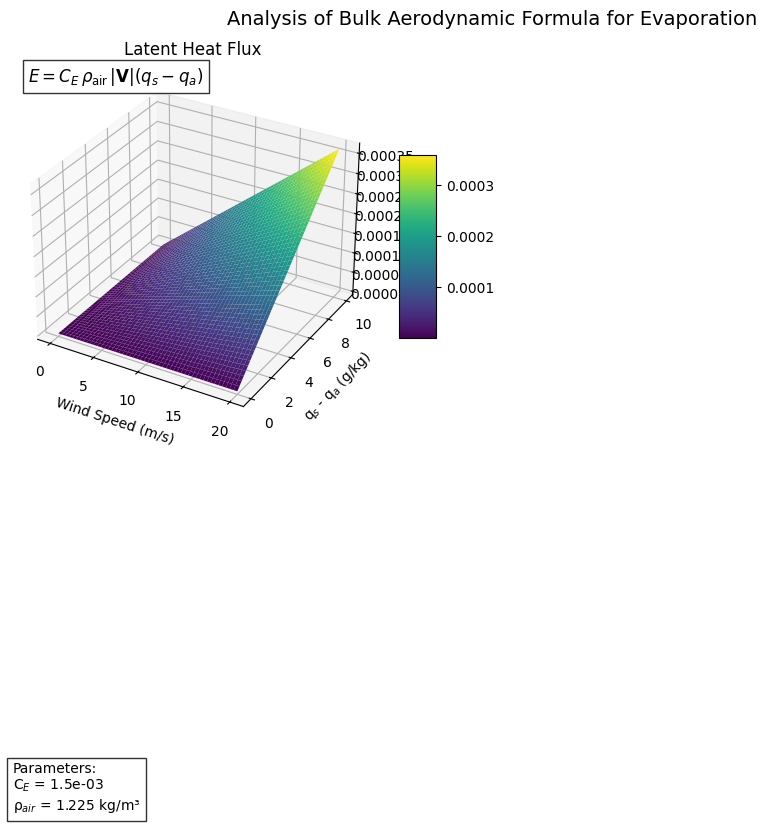

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure with reduced size
fig = plt.figure(figsize=(10, 8))  # Reduced figsize from (15, 10) to (10, 8)

# Constants and parameters
CE = 1.5e-3        # Bulk transfer coefficient
rho_air = 1.225    # Air density (kg/m³)
V = np.linspace(0, 20, 50)    # Decreased grid size for wind speed range (m/s)
q_diff = np.linspace(0, 0.01, 50)  # Decreased grid size for specific humidity difference range (kg/kg)

# Create meshgrid for 3D plotting
V_mesh, Q_diff_mesh = np.meshgrid(V, q_diff)

# Calculate evaporation rate
E = CE * rho_air * V_mesh * Q_diff_mesh

# 3D Surface plot
ax1 = fig.add_subplot(221, projection='3d')
surf = ax1.plot_surface(V_mesh, Q_diff_mesh*1000, E, cmap='viridis')
ax1.set_xlabel('Wind Speed (m/s)')
ax1.set_ylabel('q$_s$ - q$_a$ (g/kg)')
ax1.set_zlabel('E (kg/m²/s)')
ax1.set_title('Latent Heat Flux')
plt.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Add equation
ax1.text2D(0.05, 0.95, r'$E = C_E \, \rho_{\text{air}} \, |\mathbf{V}| (q_s - q_a)$',
           transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add parameters text box
param_text = (f'Parameters:\nC$_E$ = {CE:.1e}\n'
             f'ρ$_{{air}}$ = {rho_air:.3f} kg/m³')
fig.text(0.02, 0.02, param_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()
fig.suptitle('Analysis of Bulk Aerodynamic Formula for Evaporation', y=1.02, fontsize=14)

# Show plot
plt.show()

**Sensitive analysis can be done as**

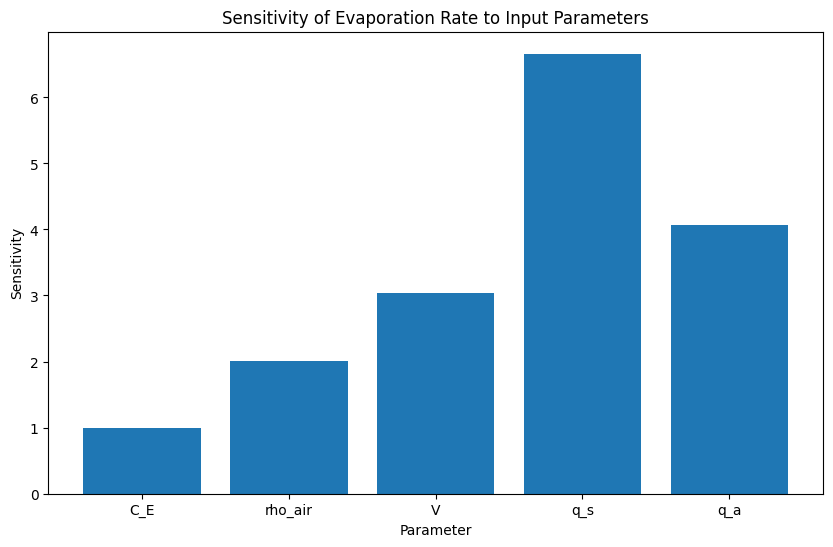

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate the evaporation rate
def calculate_evaporation_rate(C_E, rho_air, V, q_s, q_a):
    return C_E * rho_air * abs(V) * (q_s - q_a)

# Define the parameter ranges for the Monte Carlo simulation
param_ranges = {
    'C_E': (0.001, 0.003),  # Exchange Coefficient Constant (dimensionless)
    'rho_air': (1.15, 1.25),  # Air Density (kg/m³)
    'V': (2.0, 10.0),  # Wind Speed at Ocean Surface (m/s)
    'q_s': (0.015, 0.020),  # Specific Humidity at Sea Surface (kg/kg)
    'q_a': (0.010, 0.015)  # Specific Humidity of Air Above Sea Surface (kg/kg)
}

# Run the Monte Carlo simulation
n_samples = 10000
samples = {
    param: np.random.uniform(min_val, max_val, n_samples)
    for param, (min_val, max_val) in param_ranges.items()
}

# Calculate the evaporation rate for each sample
E = np.array([calculate_evaporation_rate(samples['C_E'][i], samples['rho_air'][i], samples['V'][i], samples['q_s'][i], samples['q_a'][i])
              for i in range(n_samples)])

# Calculate the sensitivity of E to each parameter
sensitivities = {}
for param in param_ranges.keys():
    mean_val = samples[param].mean()
    mean_E = E.mean()
    delta = mean_val * 0.01  # 1% change

    # Calculate E with parameter + delta
    modified_samples = samples.copy()
    modified_samples[param] += delta
    modified_E = np.array([calculate_evaporation_rate(modified_samples['C_E'][i], modified_samples['rho_air'][i], modified_samples['V'][i], modified_samples['q_s'][i], modified_samples['q_a'][i])
                          for i in range(n_samples)])

    # Calculate sensitivity
    sensitivity = ((modified_E.mean() - mean_E) / mean_E) / (delta / mean_val)
    sensitivities[param] = sensitivity

# Plot the sensitivity results
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sensitivities.keys(), sensitivities.values())
ax.set_xlabel('Parameter')
ax.set_ylabel('Sensitivity')
ax.set_title('Sensitivity of Evaporation Rate to Input Parameters')
plt.show()

**Assumptions**

*Midlatitudes Are Ignored*

*Hurricane Is Considered As Water Vapours Dispersed At Constant radius And At the End dv/dt = h
 Its Path Will Also Contain A Factory Fromm Which It Will Be Influenced*

*Translation Of Winds Will Be Governed Naturally Along Global Wind Patterns*

*Gravity Is Neglected on Water Vapours*

*Air Is Assumed to be Incompressible*

*Considering SI Units Only*